In [6]:
# Import packages
import scanpy as sc
import scvi
import os
import scvelo as scv
import anndata
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tempfile

scv.set_figure_params(dpi=200, dpi_save=600)

In [8]:
adata = scv.read(
    "/Users/zz4/Desktop/merged_raw_filtered_wadult_umap_10000.h5ad"
)
adata = adata[~adata.obs.sampleid.isin(["17w1d_I_Ret"])]
adata.obs["batch"] = adata.obs["batch"].replace(
    {"Query": "Fetal", "Reference": "Adult"}
)

In [13]:
adata = adata[adata.obs.majorclass.isin(["AC", "BC", "Cone", "HC", "MG", "RGC", "Rod"])]

In [21]:
adata.obs["_scvi_batch"] = adata.obs["_scvi_batch"].astype(str).astype("category")

saving figure to file ./figures/scvelo_figure1g.svg


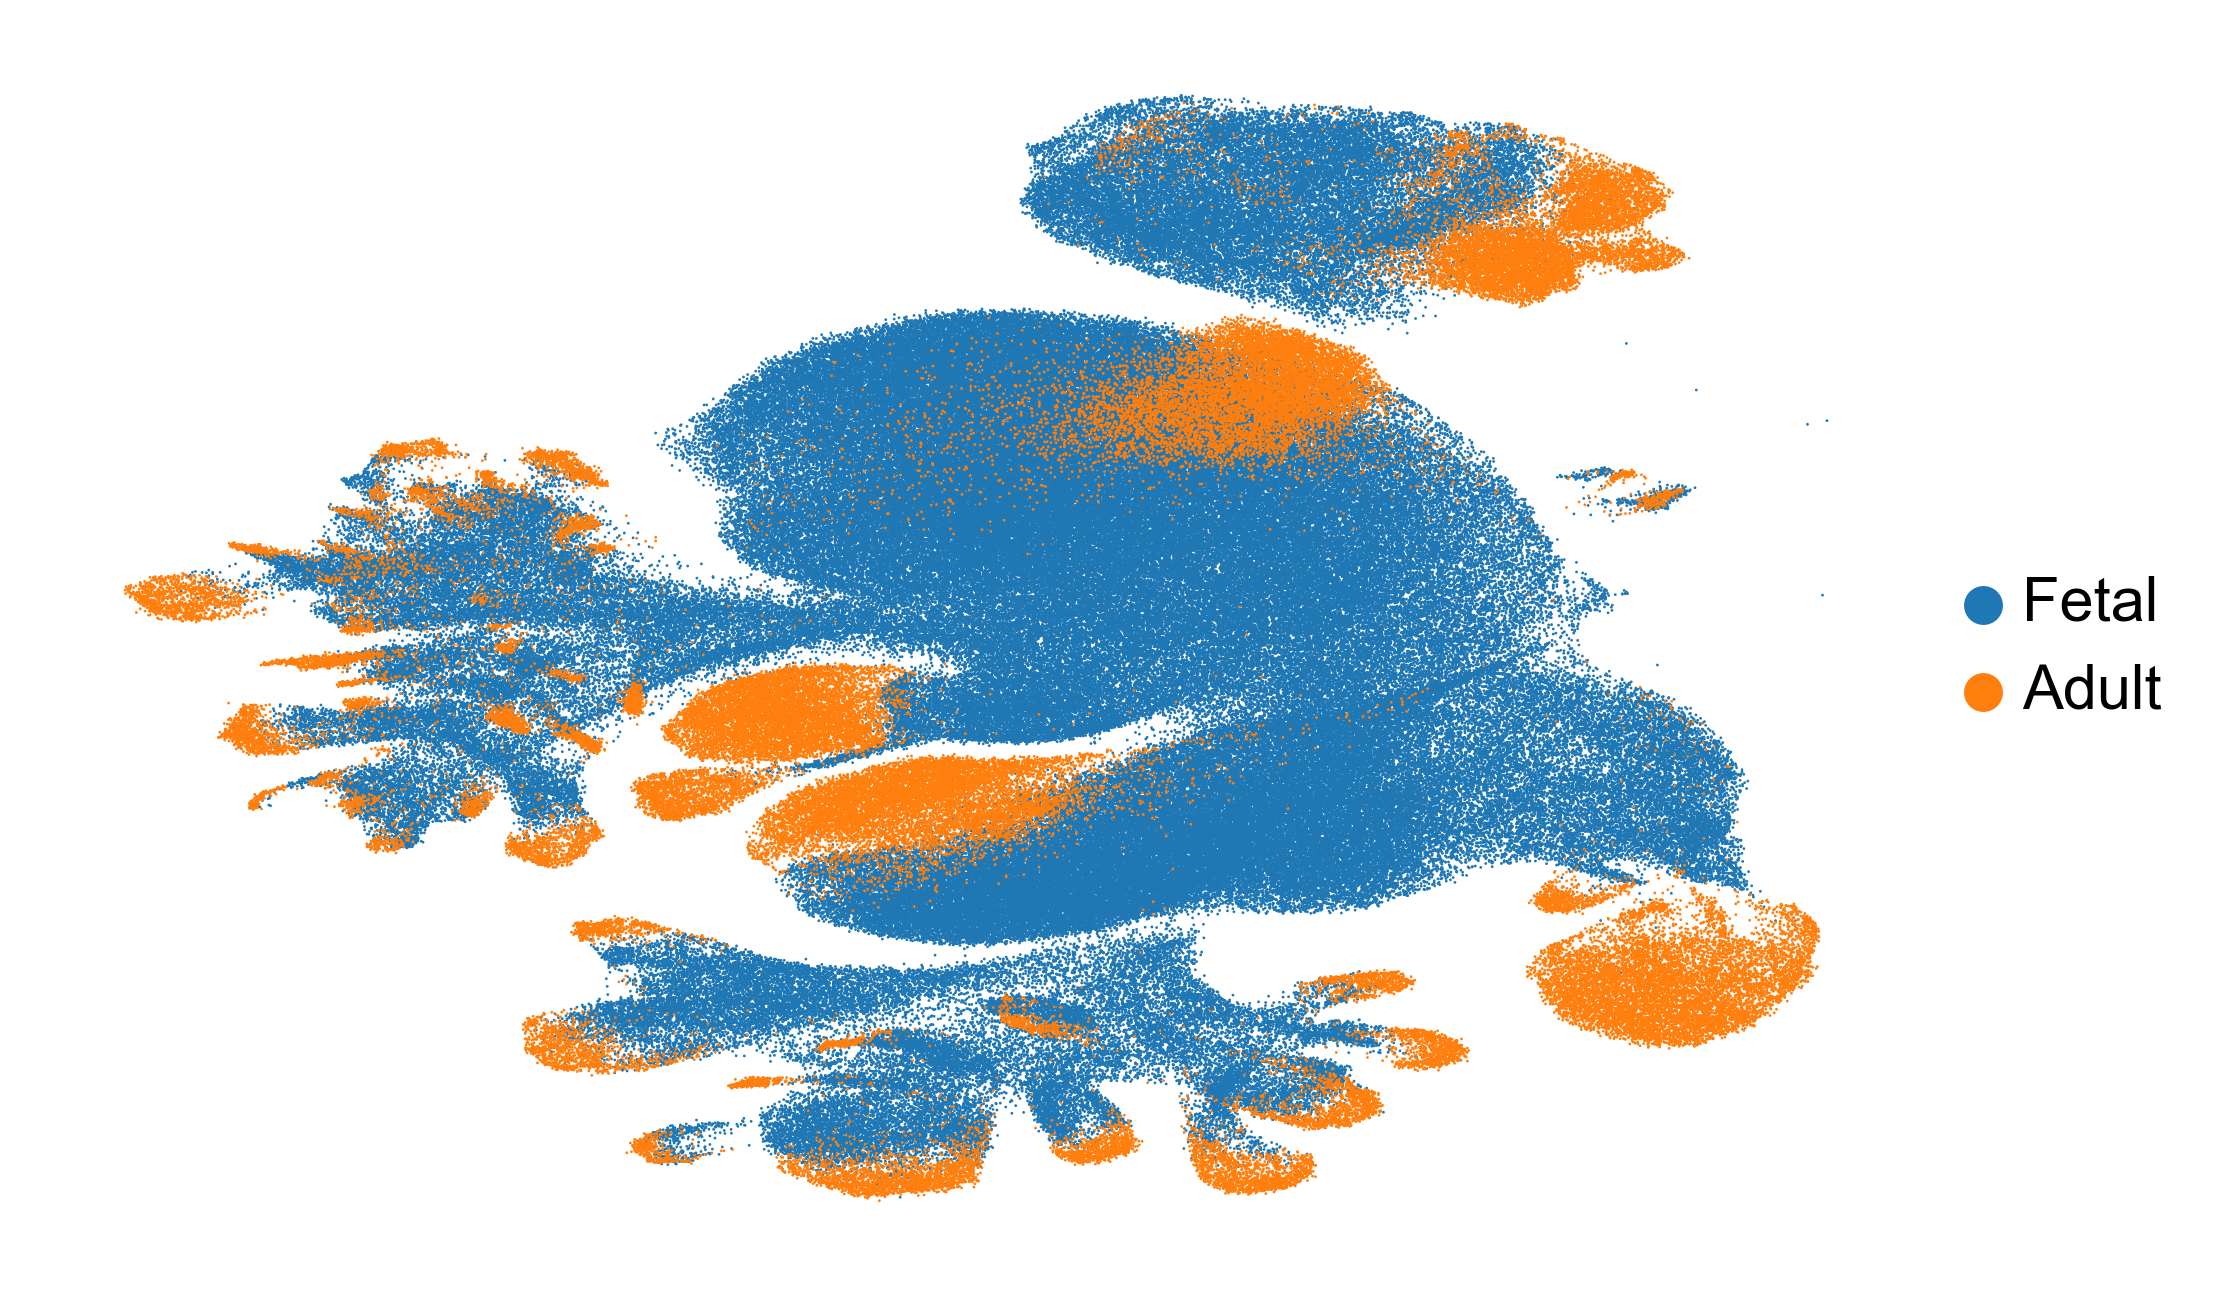

saving figure to file ./figures/scvelo_figure1f.svg


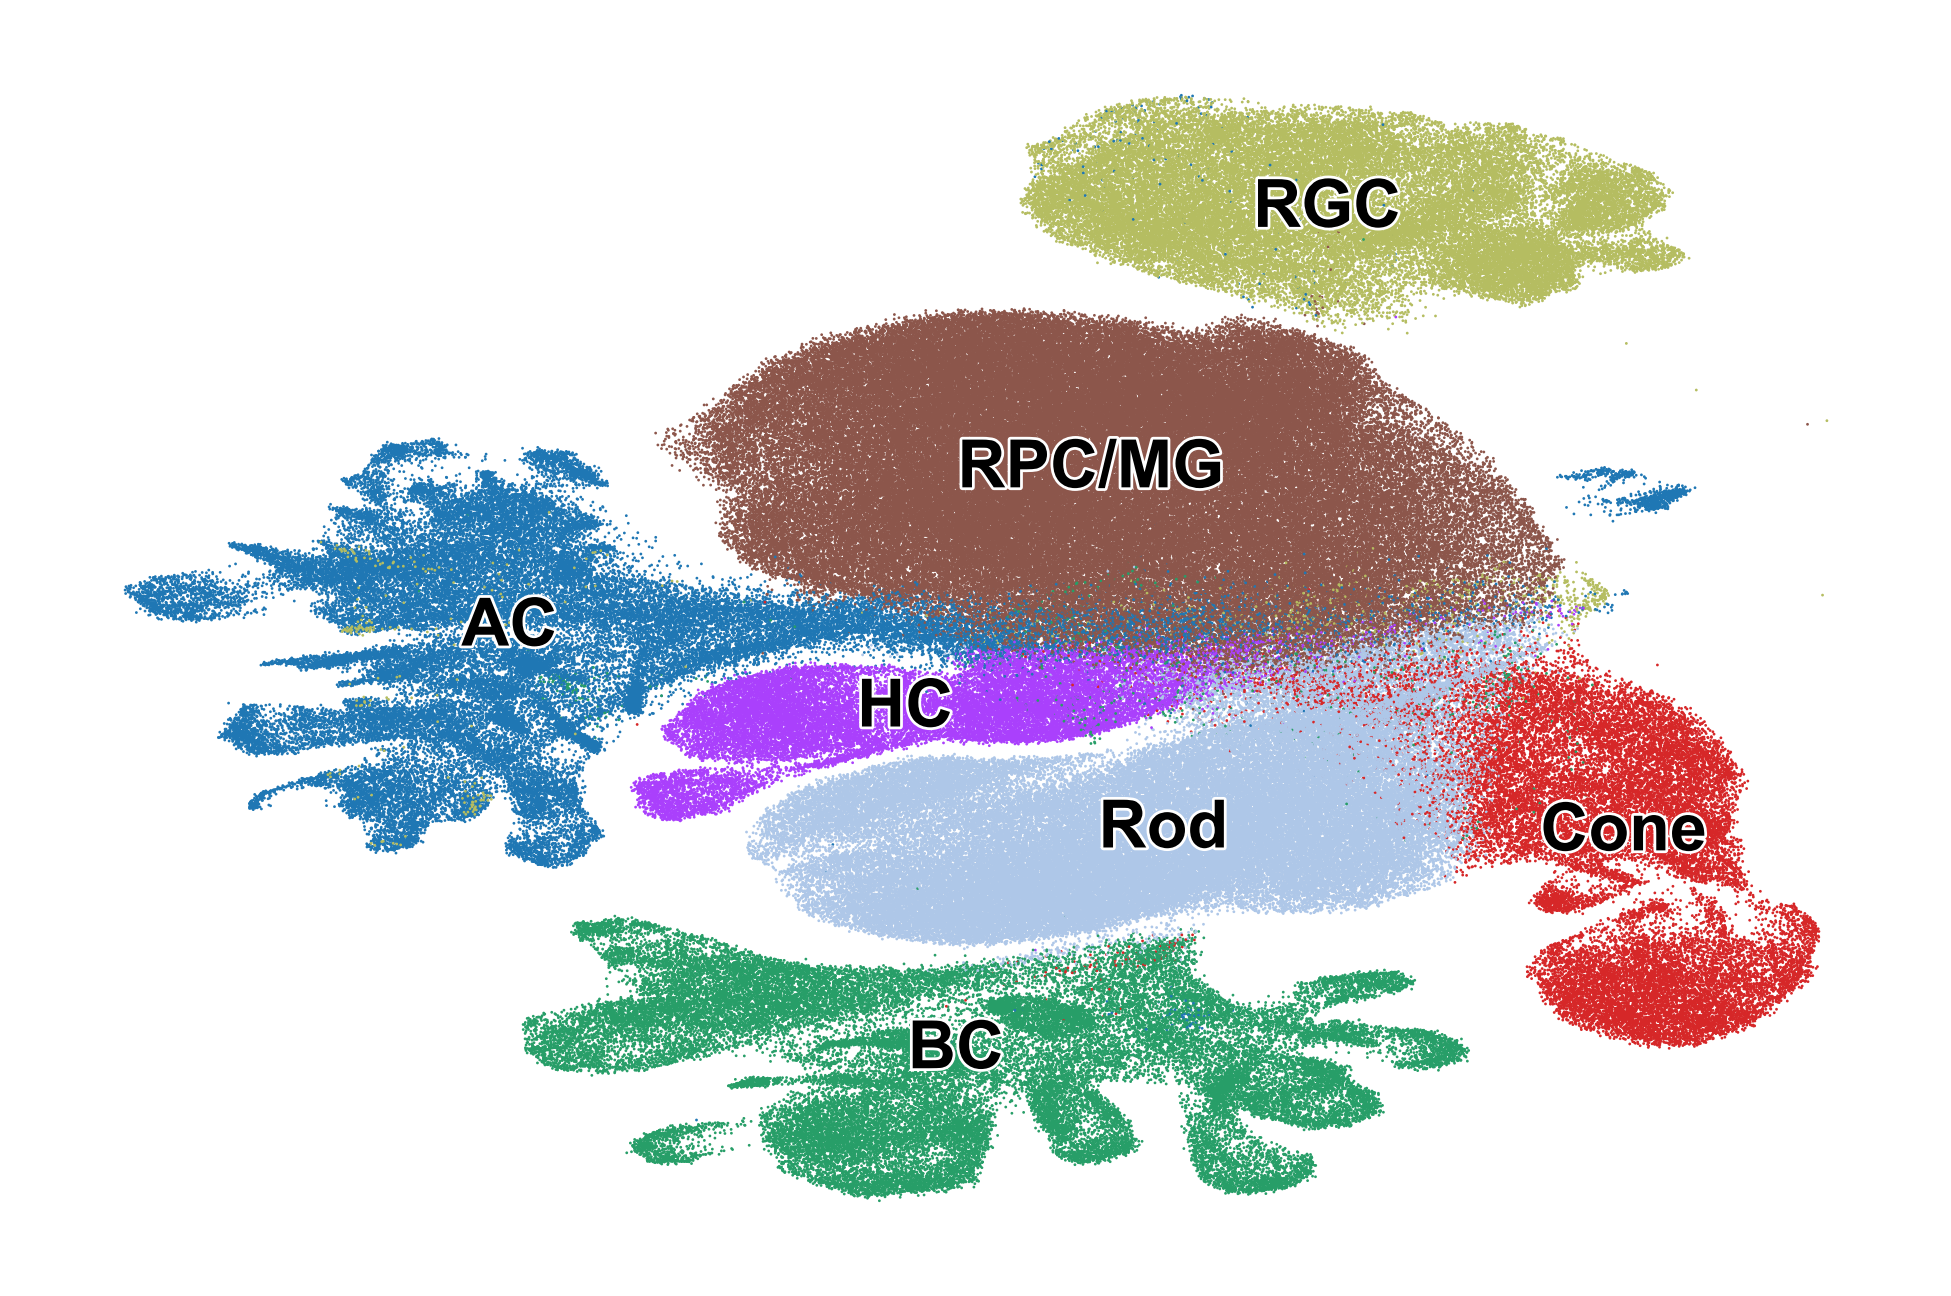

saving figure to file ./figures/scvelo_figure1h.svg


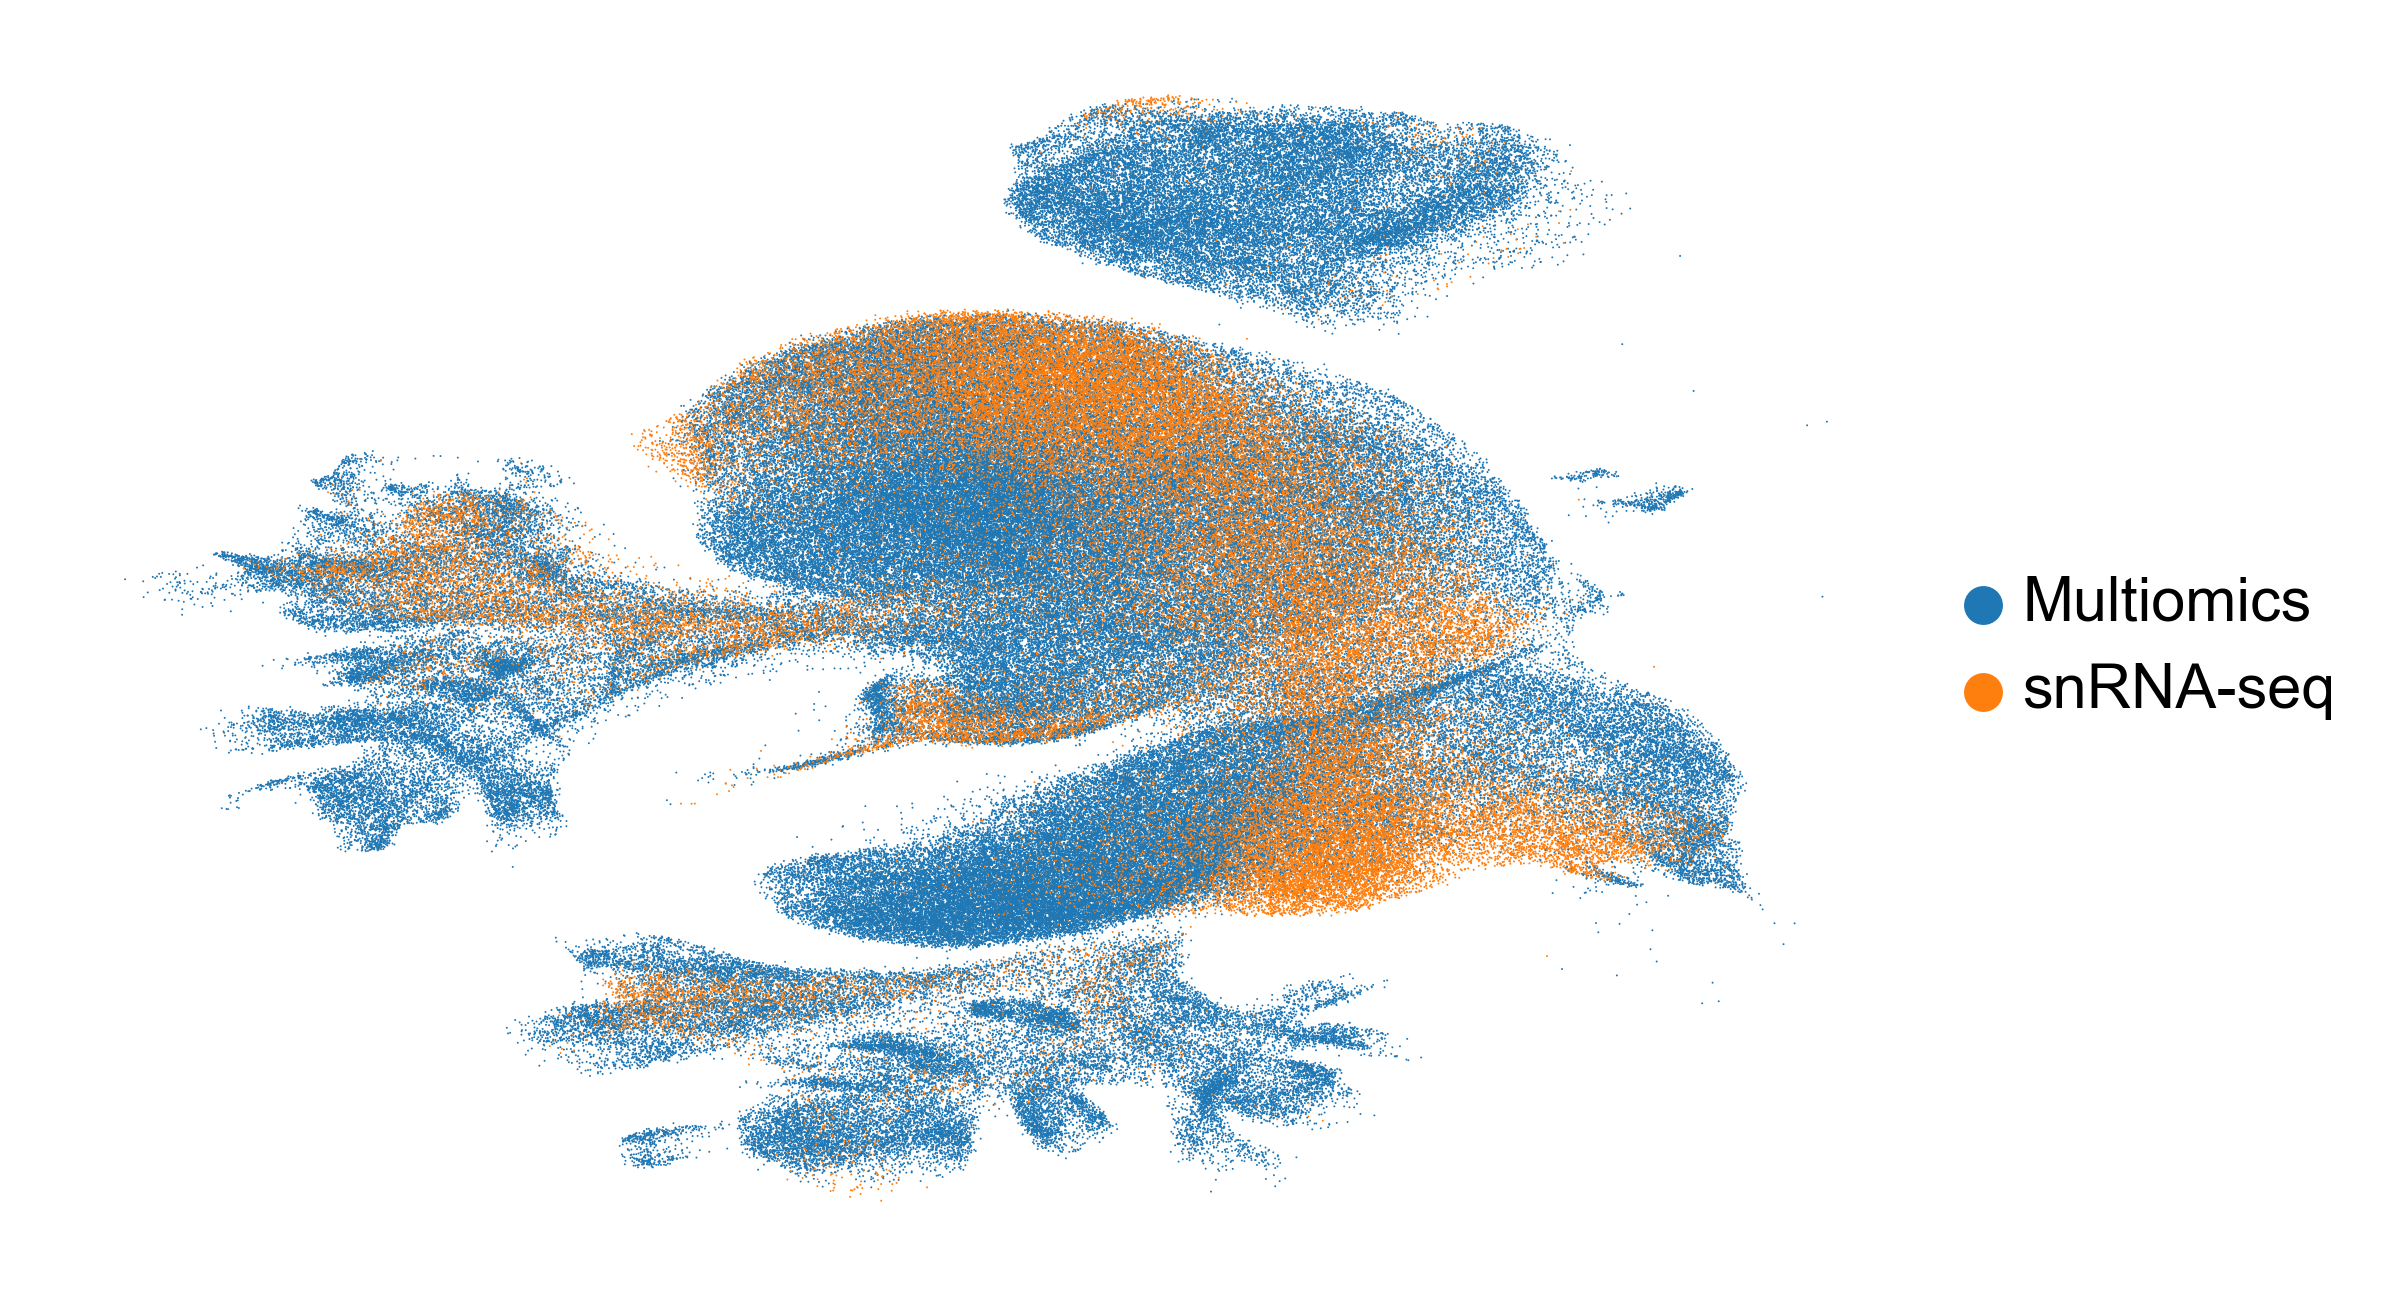

In [15]:
scv.pl.umap(
    adata,
    color="batch",
    size=1,
    legend_loc="right margin",
    title="",
    save="figure1g.svg",
)
adata.obs["majorclass"] = adata.obs["majorclass"].replace({"MG": "RPC/MG"})
scv.pl.umap(
    adata,
    color="majorclass",
    size=1,
    # legend_loc="right margin",
    title="",
    save="figure1f.svg",
)
scv.pl.umap(
    adata[
        adata.obs.batch == "Fetal",
    ],
    color="Data Type",
    size=0.5,
    legend_loc="right margin",
    title="",
    sort_order=False,
    save="figure1h.svg",
)

the obs value '_scvi_batch' has more than 103 categories. Uniform 'grey' color will be used for all categories.


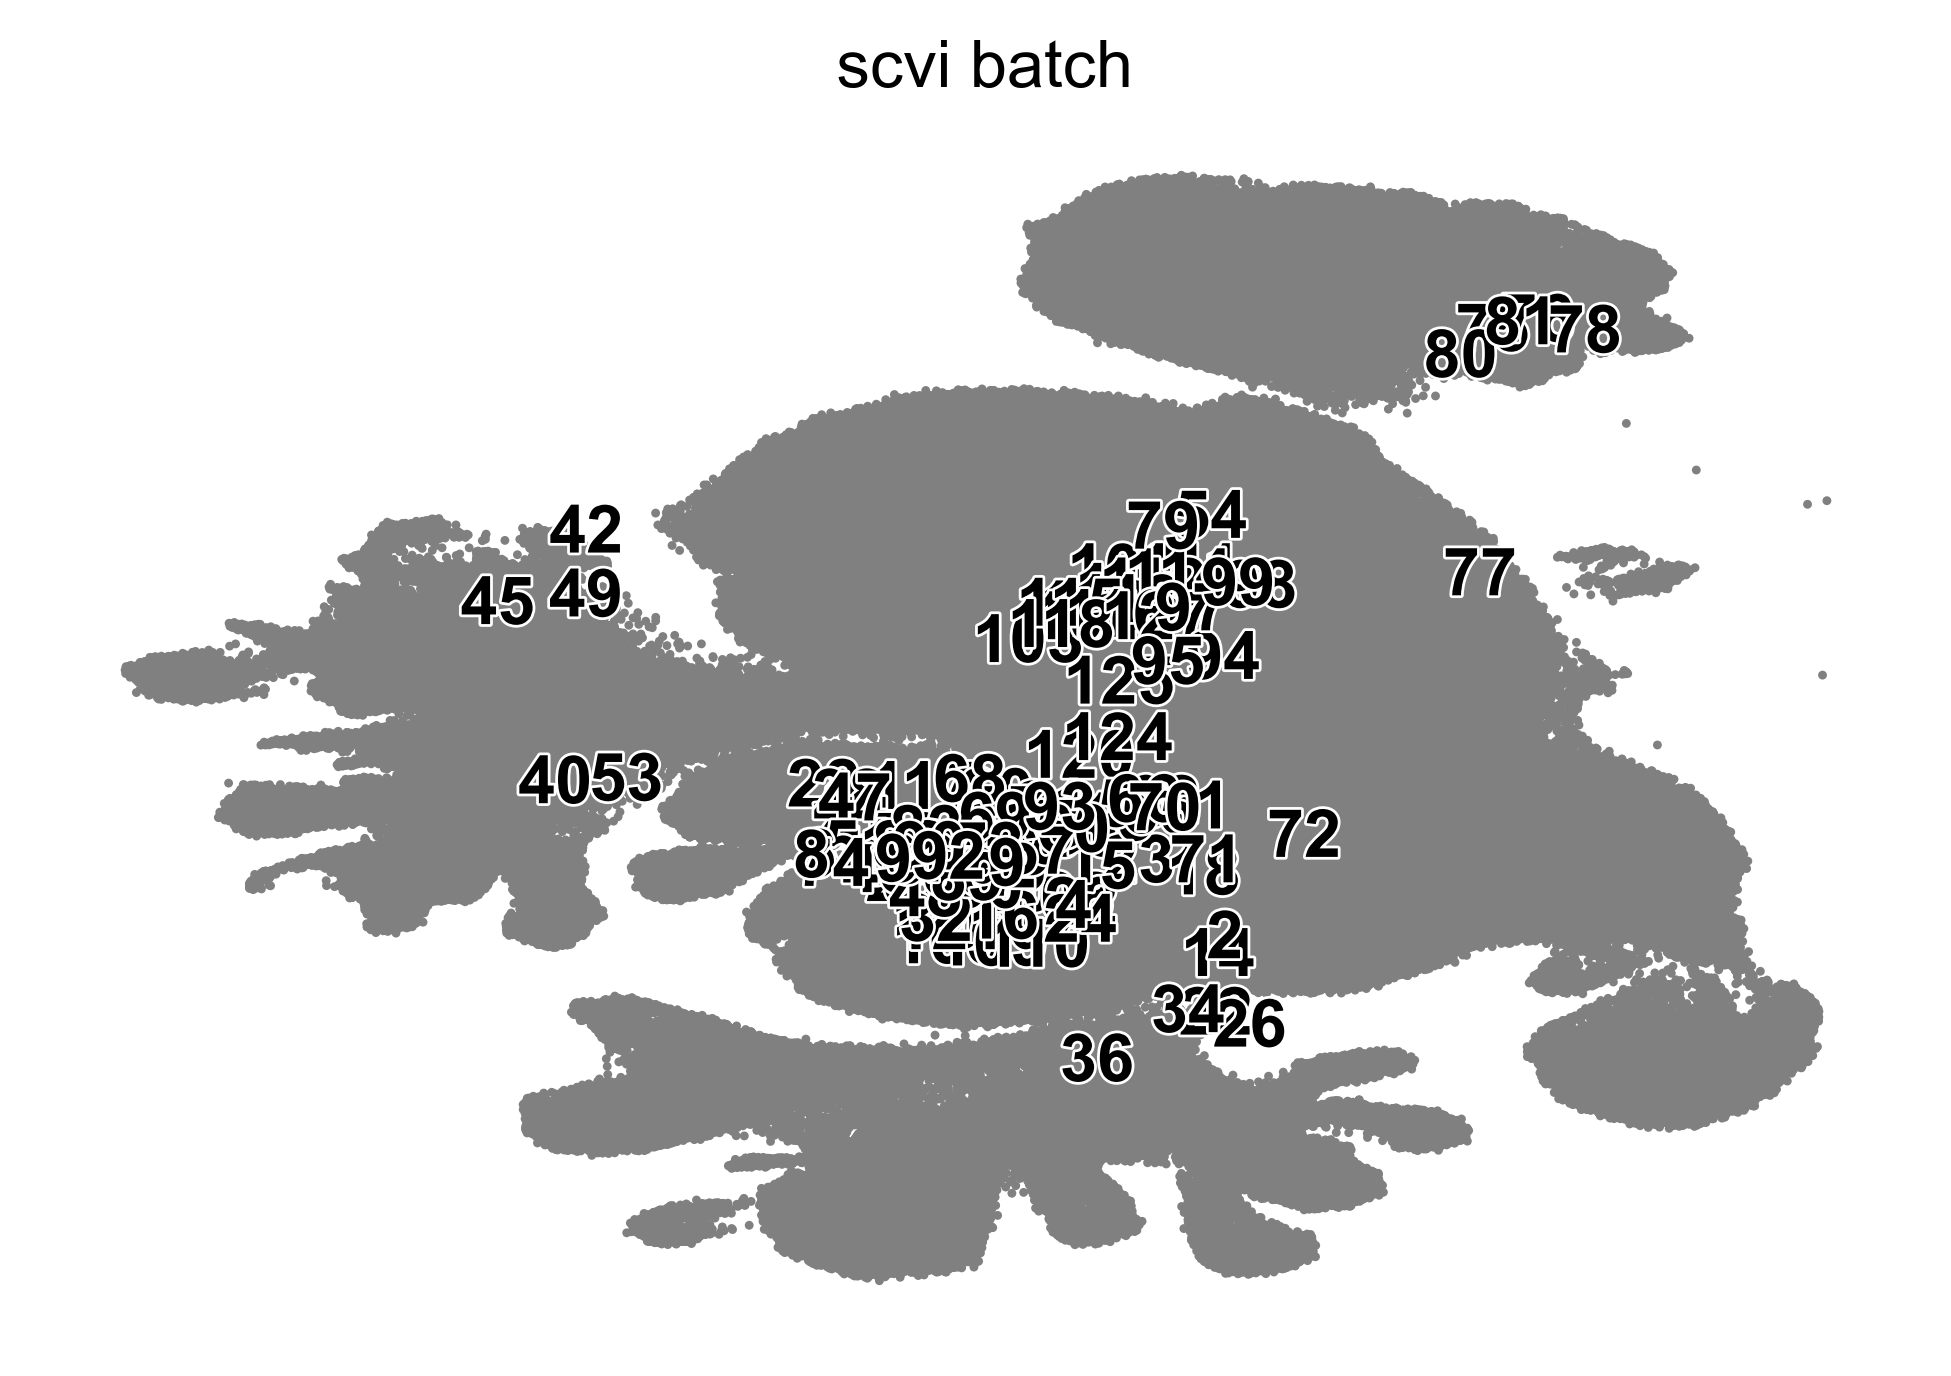

In [22]:
scv.pl.umap(
    adata,
    color="_scvi_batch")